# Arboles de Decisión

Este cuaderno contiene el código para la implementación de modelos de regresión logística en Python.

In [16]:
# Cargar librerias para ciencia de datos
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Modulos librerias para aprendizaje de maquina
from sklearn.tree import DecisionTreeClassifier # Arbol de clasificación
from sklearn.tree import DecisionTreeRegressor # Arboles de regresión
from sklearn.linear_model import LogisticRegression # Regresión logística
from sklearn.tree import plot_tree, export_text # Gráficar árbol y extraer reglas
import graphviz # Graficar árbol
from yellowbrick.model_selection import feature_importances # Gráfica de variables
from sklearn.model_selection import train_test_split # División train/test
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay # Matriz de confusión
from sklearn.metrics import classification_report # Reporte de métricas de clasificación
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error # Métricas de regresión
from yellowbrick.model_selection import ValidationCurve # Optimización de hiperparametros

pd.set_option('display.max_columns', None)

In [17]:
# Para conectarse con google drive
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [18]:
# Configurar directorio de trabajo
os.chdir('/gdrive/MyDrive/Colab Notebooks/Analitica de Datos UJaveriana')

# Verificar los archivos de las carpetas
!ls

'1. Analisis Exploratorio.ipynb'        cupones.xlsx
'2. Modelo de Regresion.ipynb'	        gastos_medicos.xlsx
 3_Regresion_Logistica.ipynb	        graficas_analisis_presentacion.ipynb
 3.Regresion_Logistica_Solucion.ipynb   incumplimiento_credito.csv
 4.Arbole_Decision_Solucion.ipynb       Modelos_Machine_Learning.ipynb
 bank_marketing.csv		        predicciones.xlsx
 credit_card_default.csv	        publicidad.csv
 cupones.csv			        Taller_Regresion_Lineal.ipynb


## Predicción de uso de cupones

In [19]:
cupon = pd.read_csv("cupones.csv")
cupon.head()

,cliente,gasto,tarjeta,cupon
0,1,2.29,1,1
1,2,3.22,1,0
2,3,2.14,1,1
3,4,3.92,0,1
4,5,2.53,1,1


In [20]:
# Selección X y Y
Y = cupon['cupon']

X = cupon[['gasto','tarjeta']]

In [21]:
# Dividir los datos en cojunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.7, random_state=7)

In [22]:
# Entrenar arbol de clasificación
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [23]:
# Orden las clases en el arbol
dt.classes_.astype('str')

array(['0', '1'], dtype='<U21')

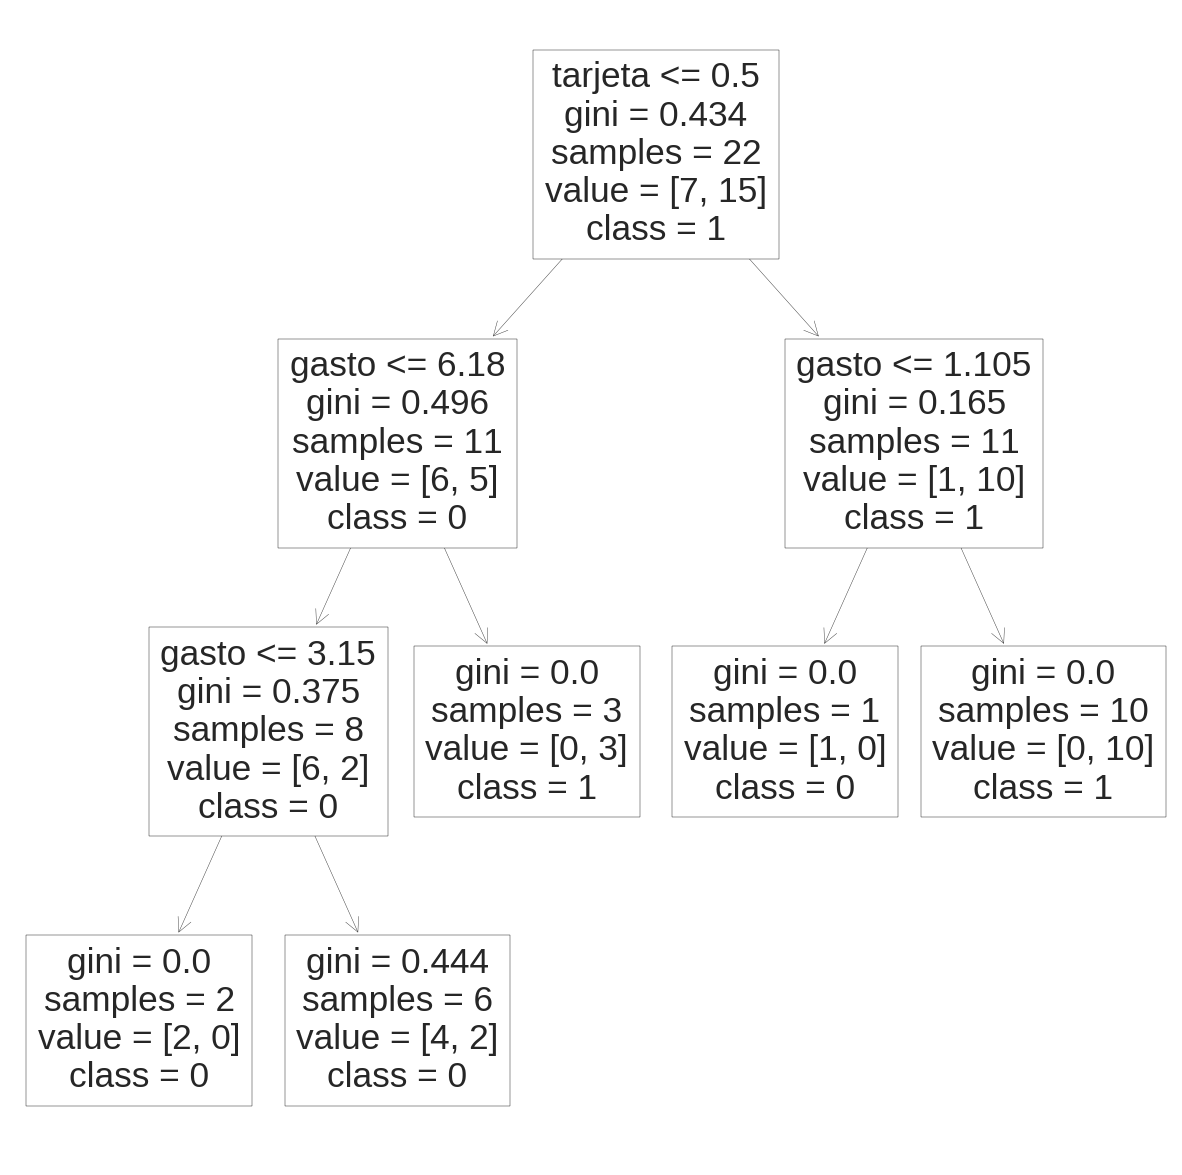

In [24]:
# El siguiente codigo se utilizar para visualizar el árbol
plt.figure(figsize=(15,15))
plot_tree(dt, feature_names=X.columns, class_names=dt.classes_.astype('str'))
plt.show()

In [25]:
# Extraer las reglas
text_representation = export_text(dt, feature_names=list(dt.feature_names_in_))
print(text_representation)

|--- tarjeta <= 0.50
|   |--- gasto <= 6.18
|   |   |--- gasto <= 3.15
|   |   |   |--- class: 0
|   |   |--- gasto >  3.15
|   |   |   |--- class: 0
|   |--- gasto >  6.18
|   |   |--- class: 1
|--- tarjeta >  0.50
|   |--- gasto <= 1.10
|   |   |--- class: 0
|   |--- gasto >  1.10
|   |   |--- class: 1



In [26]:
# Generar predicciones
y_pred = dt.predict(X_test)

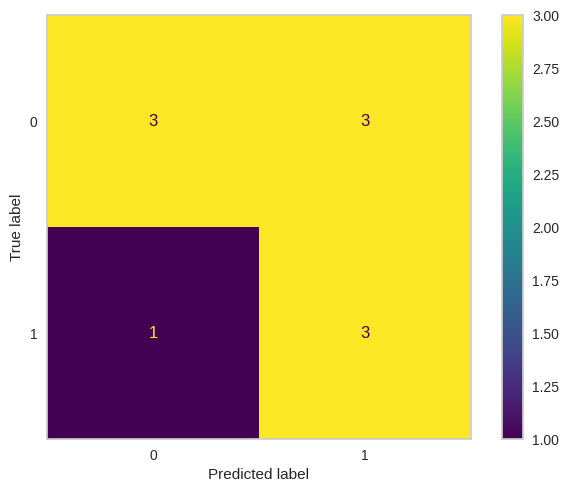

In [27]:
# Generar matriz de confusión para conjunto de prueba
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm).plot()
plt.grid(False)

In [28]:
# Generar un reporte con las principales métricas.
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.50      0.60         6
           1       0.50      0.75      0.60         4

    accuracy                           0.60        10
   macro avg       0.62      0.62      0.60        10
weighted avg       0.65      0.60      0.60        10



## Caso. Incumplimiento en pago de tarjeta de crédito

**Contexto:** Este conjunto de datos contiene información de sobre incumplimientos de pagos en creditos, y entrega información de los clientes de acuerdo a factores demográficos, datos crediticios, historial de pagos y estados de cuenta de tarjetas de crédito.

**Objetivo:** Entrenar un clasificador basado en arboles de decisión el cual  permita construir reglas para detectar clientes en riesgo de default y estimar la probabilidad de esta categoría.

In [29]:
datos_credito = pd.read_csv("incumplimiento_credito.csv")
datos_credito.head()

,saldo_cuenta(millones),duracion_prestamo_meses,historial_crediticio,proposito,monto(millones),saldo_ahorros(millones),antiguedad_empleo,tasa_cuotas,estado_personal,otros_deudores,historial_residencia,propiedad,edad,plan_cuotas,vivienda,creditos_existentes,trabajo,dependientes,telefono,trabajador_extranjero,incumplimiento
0,< 1M,6,crítico,radio/televisión,1169,desconocido,> 7 años,4,hombre soltero,ninguno,4,bienes raíces,67,ninguno,propia,2,empleado calificado,1,sí,sí,0
1,1M - 10M,48,pagado,radio/televisión,5951,< 1M,1 - 4 años,2,mujer,ninguno,2,bienes raíces,22,ninguno,propia,1,empleado calificado,1,ninguno,sí,1
2,desconocido,12,crítico,educación,2096,< 1M,4 - 7 años,2,hombre soltero,ninguno,3,bienes raíces,49,ninguno,propia,1,residente no calificado,2,ninguno,sí,0
3,< 1M,42,pagado,muebles,7882,< 1M,4 - 7 años,2,hombre soltero,aval,4,sociedad de ahorros y préstamos,45,ninguno,gratuita,1,empleado calificado,2,ninguno,sí,0
4,< 1M,24,retrasado,coche (nuevo),4870,< 1M,1 - 4 años,3,hombre soltero,ninguno,4,desconocido/nada,53,ninguno,gratuita,2,empleado calificado,2,ninguno,sí,1


In [30]:
datos_credito.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   saldo_cuenta(millones)   1000 non-null   object
 1   duracion_prestamo_meses  1000 non-null   int64 
 2   historial_crediticio     1000 non-null   object
 3   proposito                1000 non-null   object
 4   monto(millones)          1000 non-null   int64 
 5   saldo_ahorros(millones)  1000 non-null   object
 6   antiguedad_empleo        1000 non-null   object
 7   tasa_cuotas              1000 non-null   int64 
 8   estado_personal          1000 non-null   object
 9   otros_deudores           1000 non-null   object
 10  historial_residencia     1000 non-null   int64 
 11  propiedad                1000 non-null   object
 12  edad                     1000 non-null   int64 
 13  plan_cuotas              1000 non-null   object
 14  vivienda                 1000 non-null   

## Regresión logística

### Preparar los datos

In [31]:
# Divida variables independientes Xs y variable dependiente y
Y = datos_credito['incumplimiento']
X = datos_credito.drop(columns=['incumplimiento'])

In [32]:
# Cree las variables dummies
X = pd.get_dummies(X)

In [33]:
# Dividir los datos en cojunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.7, random_state=7)

### Entrenar el modelo

In [34]:
# Entrenar el modelo de regresión
regresion_logistica = LogisticRegression(max_iter=1000)
regresion_logistica.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

Cuando se tiene una gran cantidad de variables se puede generar una gráfica de importancia de variables:

/usr/local/lib/python3.10/dist-packages/yellowbrick/model_selection/importances.py:194: YellowbrickWarning: detected multi-dimensional feature importances but stack=False, using mean to aggregate them.
  warnings.warn(


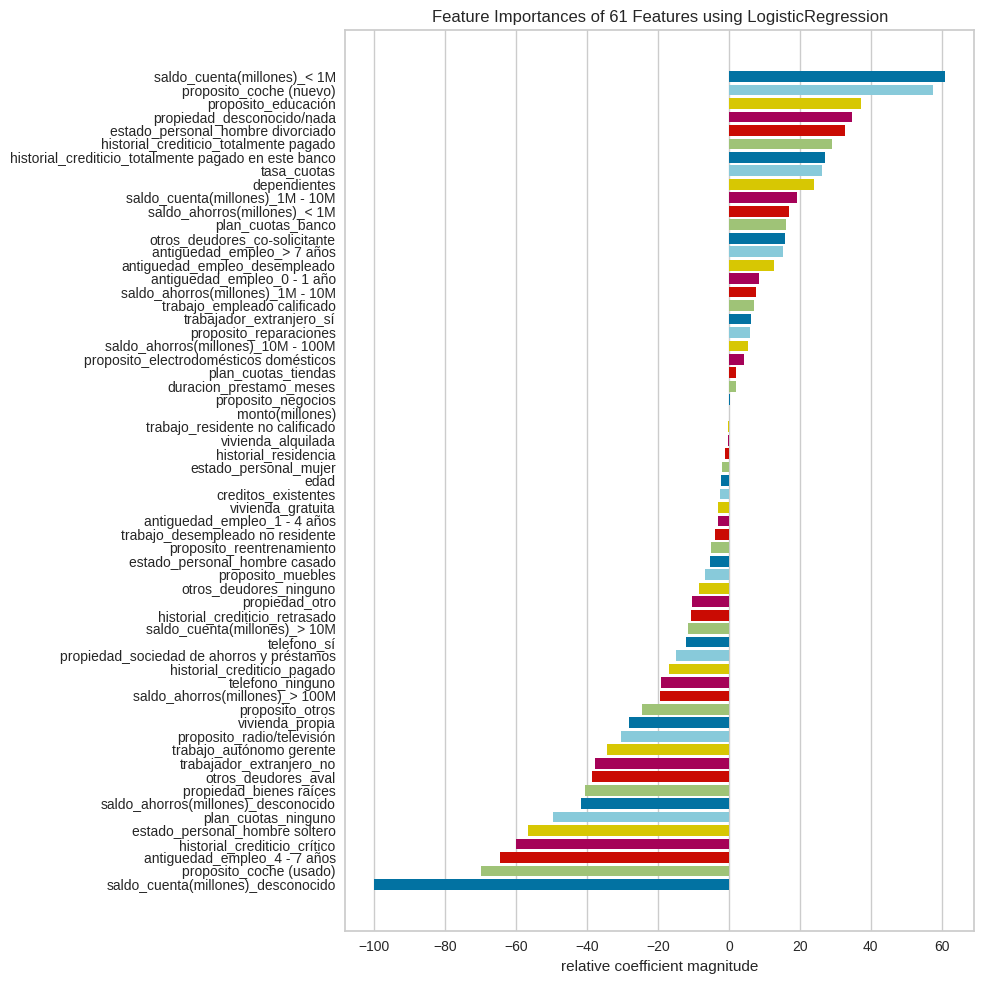

FeatureImportances(ax=<Axes: title={'center': 'Feature Importances of 61 Features using LogisticRegression'}, xlabel='relative coefficient magnitude'>,
                   estimator=LogisticRegression(max_iter=1000))

In [35]:
# Gráfica de importancia de variables
plt.figure(figsize=(10,10))
feature_importances(LogisticRegression(max_iter=1000), X_train, y_train)

### Desempeño de la regresión logística

In [36]:
# Generar predicciones
y_pred = regresion_logistica.predict(X_test)

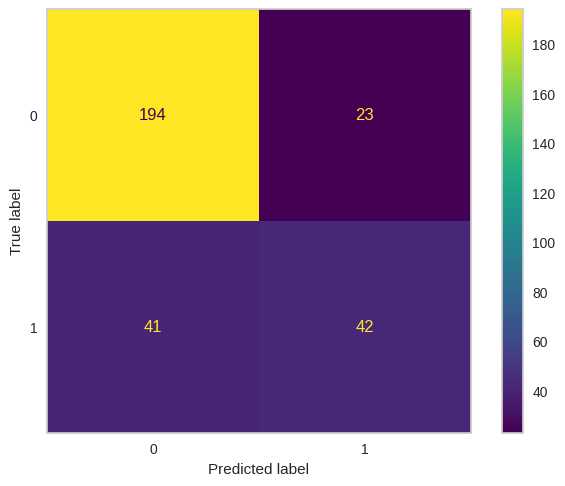

In [37]:
# Generar matriz de confusión para conjunto de prueba
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm).plot()
plt.grid(False)

In [38]:
# Generar un reporte con las principales métricas.
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       217
           1       0.65      0.51      0.57        83

    accuracy                           0.79       300
   macro avg       0.74      0.70      0.71       300
weighted avg       0.78      0.79      0.78       300



## Arbol de Clasificación

### Entrenamiento

In [39]:
# Configurar el árbol y entrenar


### Análisis de variables y predicciones

In [40]:
# Extraer las reglas


In [41]:
# Gráfica de importancia de variables
# plt.figure(figsize=(10,10))
# feature_importances(DecisionTreeClassifier(max_depth=3) , X_train, y_train)

In [42]:
# Generar predicciones


In [43]:
# Generar matriz de confusión para conjunto de prueba


In [44]:
# Generar un reporte con las principales métricas.


**Compare el desempeño de la regresión logística con el arbol de clasificación ¿Qué modelo funciona mejor? ¿Qué aspectos**

### Optimización de hiperparámetros

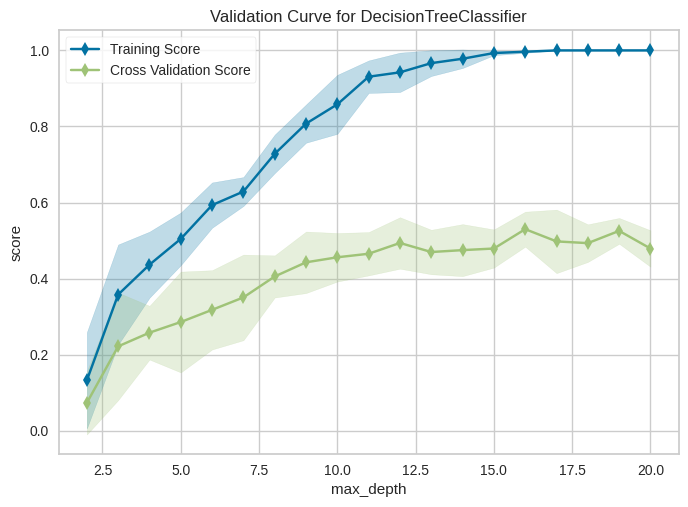

<Axes: title={'center': 'Validation Curve for DecisionTreeClassifier'}, xlabel='max_depth', ylabel='score'>

In [ ]:
# Parametro: "max_depth"
# Rango de busqueda: de 2 a 21
# Metrica: "recall"
# Validación cruzada (cv): 5 folds
curva_calibracion = ValidationCurve(
    DecisionTreeClassifier(),
    param_name="max_depth",
    param_range=np.arange(2, 21),
    cv=5,
    scoring="recall")

curva_calibracion.fit(X_train, y_train)
curva_calibracion.show()

### Entrenar con parámetro óptimo

In [ ]:
# Configurar el árbol y entrenar
dt_cred = DecisionTreeClassifier(max_depth=10)
dt_cred.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10)

In [ ]:
# Generar predicciones
y_pred_dt_md10 = dt_cred.predict(X_test)

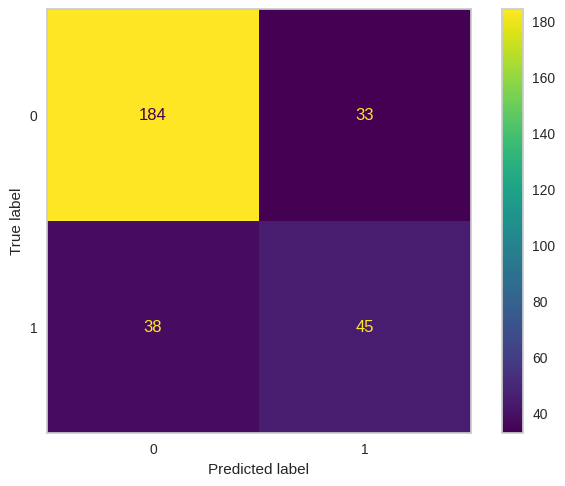

In [ ]:
# Generar matriz de confusión para conjunto de prueba
cm = confusion_matrix(y_test, y_pred_dt_md10)
cm_display = ConfusionMatrixDisplay(cm).plot()
plt.grid(False)

In [ ]:
# Generar un reporte con las principales métricas con max_depth=10.
print(classification_report(y_test, y_pred_dt_md10))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84       217
           1       0.58      0.54      0.56        83

    accuracy                           0.76       300
   macro avg       0.70      0.70      0.70       300
weighted avg       0.76      0.76      0.76       300



In [ ]:
# Generar un reporte con las principales métricas con max_depth=3.
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.73      0.95      0.83       217
           1       0.38      0.07      0.12        83

    accuracy                           0.71       300
   macro avg       0.55      0.51      0.47       300
weighted avg       0.63      0.71      0.63       300



## Arboles de regresión. Estimación de gastos médicos

Construya un árbol de regresión para estimar los gastos de médicos.

1. Ajuste el el hiperparámetro de profundidad del arbol (`max_depth`) para minimizar el MSE.
2. Luego entrene el árbol de regresión el valor optimo de profundidad.
3. Evalue las predicciones teniendo en cuenta el MSE, RMSE y MAPE.
4. Analice las predicciones y compare los resultados del árbol con el modelo de regresión lineal. Cual de estos modelos genera mejores predicciones.
5. Tambien haga una análisis de variables más importantes.

**Nota:** Recuerde que para el árbol de regresión se deben utilizar

In [45]:
gastos = pd.read_excel("gastos_medicos.xlsx")
gastos.head(10)

,sexo,edad,hijos,region,imc,fumador,gastos
0,mujer,19,0,suroccidente,27.900,si,16884.92
1,hombre,18,1,suroriente,33.770,no,1725.55
2,hombre,28,3,suroriente,33.000,no,4449.46
3,hombre,33,0,noroccidente,22.705,no,21984.47
4,hombre,32,0,noroccidente,28.880,no,3866.86
5,mujer,31,0,suroriente,25.740,no,3756.62
6,mujer,46,1,suroriente,33.440,no,8240.59
7,mujer,37,3,noroccidente,27.740,no,7281.51
8,hombre,37,2,nororiente,29.830,no,6406.41
9,mujer,60,0,noroccidente,25.840,no,28923.14
